In [2]:
# 发球因子
import pandas as pd
df = pd.read_csv('./data/df.csv').to_dict()
cnt1 = 0
cnt2 = 0
win1 = 0
win2 = 0
for i,j in df['server'].items():
    if df['point_victor'][i] == 1:
        win1 += 1
    if df['point_victor'][i] == 2:
        win2 += 1
    if df['point_victor'][i] == j == 1:
        cnt1 += 1
    if df['point_victor'][i] == j == 2:
        cnt2 += 1
print(cnt1/win1, cnt2/win2)
print((cnt1/win1+cnt2/win2)/2)

0.6594943518020441 0.6873247335950645
0.6734095426985542



result is
(0.7638349122129025, 0.9910293888975986, 2, 297, {'1%': -3.4525611751768914, '5%': -2.87132117782556, '10%': -2.5719816428028888}, 411.41651880401463)

result_fromat is
Test Statistic                                                   0.763835
p-value                                                          0.991029
Lags Used                                                        2.000000
Number of Observations Used                                    297.000000
Critical Value (1%)                                             -3.452561
Critical Value (5%)                                             -2.871321
Critical Value (10%)                                            -2.571982
The maximized information criterion if autolag is not None.    411.416519
dtype: float64


===== adfuller()的回归模型系数 =====
r.resols.summary() is
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.046
M

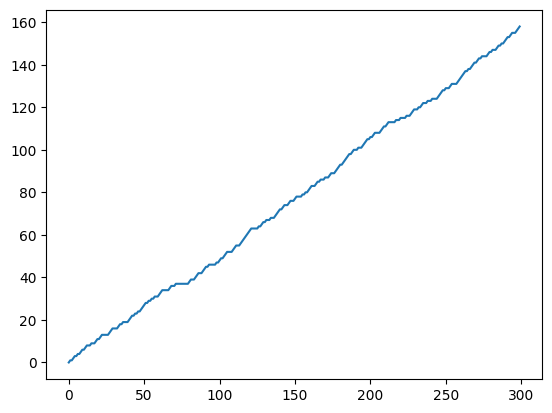

In [21]:
# ADF检验
from statsmodels.tsa.stattools import adfuller
import numpy as np
from itertools import pairwise
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/single_df.csv').to_dict()
seq = [i for i in df['p1_points_won'].values()]
# for _ in range(1):
#     seq = [i-j for i,j in pairwise(seq)]
plt.plot(seq)
# seq = [i for i in df['p2_points_won'].values()]

result = adfuller(seq, autolag='AIC')
print("\nresult is\n{}".format(result))

result_fromat = pd.Series(result[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for k, v in result[4].items():
    result_fromat['Critical Value (%s)' % k] = v
result_fromat['The maximized information criterion if autolag is not None.'] = result[5]
print("\nresult_fromat is\n{}".format(result_fromat))

print("\n\n===== adfuller()的回归模型系数 =====")
[t, p, c, r] = adfuller(x=seq, regression='ctt', regresults=True)

print("r.resols.summary() is")
print(r.resols.summary())

print("\nr.resols.params are")
print(r.resols.params)